# Handwritten Digits Recognition

### Importing required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
 # loading keras hand written digits data set and splitting the images data into train and test variables
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data() 

In [3]:
len(X_train) # number of images in X_train

60000

In [4]:
len(X_test) # number of images in X_test

10000

In [5]:
X_train.shape # given below is shape of X_train data that defining 60000 samples and each picture is of 28 by 28

(60000, 28, 28)

In [6]:
X_train[0].shape # Individual image shape 

(28, 28)

In [7]:
# visualize the 2d array containing values from 0 to 255, Where 0 represents the black and 255 represents the white color
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# As the values are from 0 to 255, i am going to scale the values for better computation of neural network.
# for scalling i divide each value with 255 which is maximum number com=ntain by an image.
X_train=X_train/255
X_test=X_test/255 

In [9]:
# Now the next task is to convert 2d array into 1d in order to feed image as input, this process can be done by 
# keras built in Flatten function, but i'm doing this with pandas reshape function fro better understanding of how
# this thing works. Given below cells i flattend the X_train and X_test into 1d array.
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape 

(60000, 784)

In [10]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [11]:
from tensorflow.keras.initializers import RandomNormal

### Creating Keras sequential model

In [25]:
# given below, a sequential dense neural network is created, with random seed 1 in order to gain reproducibility,
# learning rate is set to 0.1 and biased is added as per requirement.
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_initializer=RandomNormal(seed=1), use_bias=True),
    keras.layers.Dense(10,activation='sigmoid',kernel_initializer=RandomNormal(seed=1),use_bias=True)
])

opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(X_train_flattened,y_train,batch_size=32,epochs=5,validation_data=(X_test_flattened, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3499 - accuracy: 0.8993 - val_loss: 0.1809 - val_accuracy: 0.9468
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1625 - accuracy: 0.9524 - val_loss: 0.1336 - val_accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1156 - accuracy: 0.9665 - val_loss: 0.1095 - val_accuracy: 0.9653
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9729 - val_loss: 0.0918 - val_accuracy: 0.9706
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9783 - val_loss: 0.0853 - val_accuracy: 0.9719


In [26]:
# evalauting the trained model on Test set.
#model.evaluate(X_test_flattened,y_test)
# w=model.get_weights()
#w

[array([[ 0.00633252, -0.02465083,  0.03155954, ...,  0.06188971,
          0.02023459, -0.03130072],
        [ 0.03382991,  0.07840832, -0.02440184, ...,  0.00374039,
          0.08447196, -0.11356942],
        [ 0.01795554, -0.01586466,  0.00113667, ...,  0.01902976,
          0.1013484 , -0.06211188],
        ...,
        [-0.0215932 ,  0.02783131, -0.01934118, ...,  0.04441012,
         -0.00096209, -0.01333892],
        [-0.03127505,  0.05986859, -0.01358522, ..., -0.10367757,
         -0.02514987,  0.02966319],
        [-0.08377036,  0.02464761,  0.01003189, ...,  0.04015469,
         -0.00883842, -0.08959898]], dtype=float32),
 array([ 0.11750198,  0.04748308, -0.00153233, -0.0373655 ,  0.0812676 ,
        -0.01925888,  0.19768436,  0.08610166, -0.06671242,  0.10361182,
         0.12224916,  0.00176264,  0.02892572, -0.20506711,  0.02626719,
        -0.01383226,  0.00590305,  0.01234101,  0.00327723, -0.11837133,
         0.1094605 ,  0.06097292,  0.10868532,  0.12392385,  0.030

In [27]:
# lets analyze some predictions made by model
y_predicted= model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


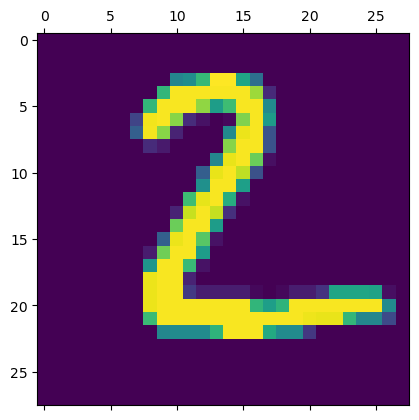

In [28]:
plt.matshow(X_test[1])

In [29]:
# The predicted output will be the vector containing percentages
y_predicted[1]

array([6.3946408e-01, 8.3092755e-01, 9.9999863e-01, 9.8048300e-01,
       2.6068492e-05, 8.9254475e-01, 8.7814778e-01, 5.5301330e-06,
       9.8734510e-01, 1.1954841e-04], dtype=float32)

In [30]:
# by using numpy argamx function i will get numver with larger percentage, 
np.argmax(y_predicted[1])

2

In [31]:
# for conveniency i am going to convert all the values to inetgers or in max values
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [32]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
# As we can see above for analyzing pupose i printed first five target lables and model prediction which are same

### Creating Confusion matrix to analyze model performance

Text(95.72222222222221, 0.5, 'Truth')

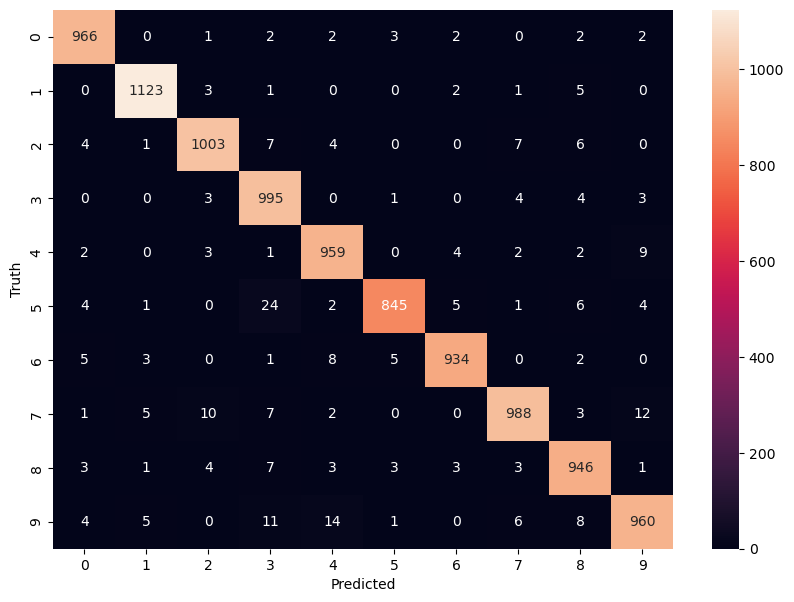

In [35]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Plotting training loss / Validation loss and Training accuracy and validation accuracy

In [36]:
# history object to gain information of training loss and accuracy and validation loss and accuracy
history.history??

In [37]:
def plot_learning_curve(history):
    # Get training and validation loss values
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get training and validation accuracy values
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot loss curve
    ax1.plot(train_loss, label='Training loss')
    ax1.plot(val_loss, label='Validation loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot accuracy curve
    ax2.plot(train_acc, label='Training accuracy')
    ax2.plot(val_acc, label='Validation accuracy')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    # Show plot
    plt.show()

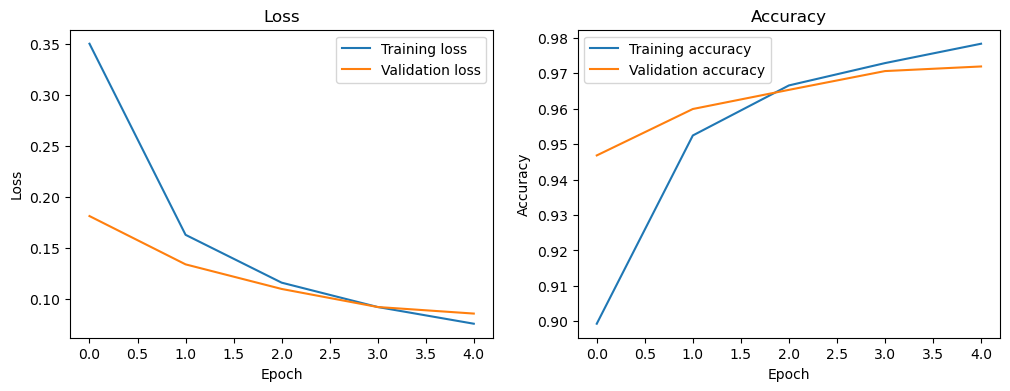

In [38]:
plot_learning_curve(history)